This File was to figure out how to write a Neural Network. If you already know how then this will probably not be useful.

In [40]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
import pickle
import networkx as nx
import random as rand
import matplotlib.pyplot as plt
from qiskit import Aer, execute
#way to visualize the graphs
def DrawGraph(Graph):
    plt.rcParams["figure.figsize"] = (10,6)
    pos=nx.spring_layout(Graph) 
    nx.draw_networkx(Graph,pos)
    labels = nx.get_edge_attributes(Graph,'weight')
    nx.draw_networkx_edge_labels(Graph,pos,edge_labels=labels)
    plt.show()
    return 
#way to convert the graphs to a easy formatable manner
def matrix_to_edges(matrix):
    edges = []
    num_rows, num_cols = matrix.shape

    for row in range(num_rows):
        for col in range(row,num_cols):
            if matrix[row, col] != 0 and row!=col:
                edges.append((row, col))

    return edges
def CheckSol(graph1,graph2):
    check = matrix_to_edges(graph1)
    outy = matrix_to_edges(graph2)
    print(check)
    print(outy)
    graphcheck = nx.Graph()
    graphcheck.add_edges_from(check)
    graphouty = nx.Graph()
    graphouty.add_edges_from(outy)
    DrawGraph(graphouty)
    DrawGraph(graphcheck)

In [41]:
#here I am going to import the data that we set for the NN network
# Specify the file path of the pickle file
file_path = r'C:\Users\evilb\OneDrive - University of Tennessee\Research_Work\QAOA\NNQOAODataJune21.pkl'

# Open the pickle file in binary mode and load the data using pickle.load()
with open(file_path, 'rb') as file:
    data_dict = pickle.load(file)

# Now you can use the loaded dictionary
print(len(data_dict['graphs']))

853


In [42]:
from torchvision import datasets, transforms
import itertools


train = []
val=[]
valnums=[]
trainnums = []
valclock=0
for i in range(0,682):
    train.append([list(data_dict['counts'][i].values())])
    train[i].append(list(data_dict['graphs'][i]))
    trainnums.append(i)
    #try to append it to the array : trainset[i].append
for i in range(682,853):
    val.append([list(data_dict['counts'][i].values())])
    val[valclock].append(list(data_dict['graphs'][i]))
    valnums.append(valclock)
    valclock+=1
trainset = torch.tensor(trainnums)
valset = torch.tensor(valnums)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)


The reason for run through for loops is because the counts and graphs have different shapes and would not go into a tensor. I worked around this by filling a tensor with 0 through 682 and 682 through 853 respectively.
In the later iterations I add better shuffling by randomizing the values in the tensors.

The code below is to check how it works and if it works.


In [44]:
dataiter = iter(trainloader)
countdata= next(dataiter)
#len(dataiter)
# print(type(images))
print(countdata)
print(countdata[1])
#the NN will iterate though dataiter and pull the value from it to call for the values from train, the list that contains the inputs.
print(train[countdata[1]][0])
print(list(data_dict['counts'][countdata[1]].values()))
print(np.array(train[countdata[1]][1]).reshape(7,7))
print(np.array(list(data_dict['graphs'][countdata[1]])).reshape(7,7))



tensor([431, 183, 287,  54, 402, 275, 343, 262, 142, 652, 156,  21, 236, 510,
        528, 282, 442, 541, 120,  23, 319, 191, 605, 296, 147, 654,  60,  35,
        532, 555, 200, 158, 378, 409, 632,  11, 670, 371, 651, 544,  95, 249,
          3, 461, 259,  59, 616, 373, 488, 293, 406,  42, 143,  77,  18, 530,
         70, 115,  22,  79, 679, 129, 487, 295])
tensor(183)
[0.0009765625, 0.001953125, 0.00390625, 0, 0.001953125, 0.0009765625, 0.0009765625, 0.0185546875, 0.0009765625, 0, 0.00390625, 0.01953125, 0, 0.0234375, 0.005859375, 0.169921875, 0.0009765625, 0.005859375, 0, 0.009765625, 0, 0.005859375, 0.0029296875, 0.0087890625, 0.009765625, 0.0517578125, 0.013671875, 0.0498046875, 0.0185546875, 0.0439453125, 0.03515625, 0.0146484375, 0.0087890625, 0, 0.0068359375, 0.0048828125, 0.0009765625, 0.041015625, 0.009765625, 0.0380859375, 0.0009765625, 0.0009765625, 0, 0.0029296875, 0.009765625, 0.025390625, 0.0166015625, 0.0078125, 0.0185546875, 0.033203125, 0.005859375, 0.0029296875, 0.04

In [45]:
from torch import nn

# Layer details for the neural network
input_size = 64
hidden_sizes = 57
output_size = 49
# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes, output_size),
                      nn.Sigmoid())
print(model)

Sequential(
  (0): Linear(in_features=64, out_features=57, bias=True)
  (1): ReLU()
  (2): Linear(in_features=57, out_features=49, bias=True)
  (3): Sigmoid()
)


I did not necessarly like this method of making a neural network so in the other NNQAOA files I improve it.

In [46]:


criterion = nn.CrossEntropyLoss()
ticks = next(iter(trainloader))
histo=[]
gatrix=[]
for i in range(0,len(ticks)):
    histo.append(train[ticks[i]][0])
    gatrix.append(train[ticks[i]][1])
histo = torch.squeeze(torch.tensor(histo),dim=1)
gatrix = torch.squeeze(torch.tensor(gatrix),dim=1)
gatrix = gatrix.type(torch.FloatTensor)
print(histo.shape)
print(gatrix.shape)
logps = model(histo)
loss = criterion(logps, gatrix)
     


torch.Size([64, 64])
torch.Size([64, 49])


In [47]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)
     


Before backward pass: 
 None
After backward pass: 
 tensor([[ 2.2062e-04,  2.9406e-04,  1.7747e-04,  ...,  5.1844e-04,
          8.2365e-04,  4.7050e-04],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-1.0866e-05, -2.2980e-05, -7.6507e-06,  ..., -9.0981e-05,
         -6.9020e-05, -1.5739e-05],
        ...,
        [-1.7234e-04, -2.2705e-04, -1.4167e-04,  ..., -5.6258e-04,
         -7.7642e-04, -3.7942e-04],
        [ 2.0000e-04,  2.8955e-04,  1.4610e-04,  ...,  5.9837e-04,
          8.5644e-04,  5.4806e-04],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]])


In [48]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.5)

In [49]:

print('Initial weights - ', model[0].weight)
ticks = next(iter(trainloader))
histo=[]
gatrix=[]
for i in range(0,len(ticks)):
    histo.append(train[ticks[i]][0])
    gatrix.append(train[ticks[i]][1])
histo = torch.squeeze(torch.tensor(histo),dim=1)
#histo = histo.view(histo.shape[0], -1)
gatrix = torch.squeeze(torch.tensor(gatrix),dim=1)
#gatrix = gatrix.view(-1)
#histo = histo.type(torch.FloatTensor)
gatrix = gatrix.type(torch.FloatTensor)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(histo)
loss = criterion(output, gatrix)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.1212,  0.0458,  0.0584,  ..., -0.1196, -0.1172, -0.0883],
        [ 0.0174, -0.1218,  0.0216,  ...,  0.0050, -0.0137,  0.0668],
        [-0.0431, -0.0870, -0.0916,  ...,  0.0076,  0.0726, -0.0640],
        ...,
        [-0.0339, -0.1153, -0.0329,  ..., -0.0131, -0.1234,  0.0017],
        [-0.1034,  0.0426,  0.0065,  ..., -0.0202, -0.1219, -0.0527],
        [ 0.0435, -0.0151, -0.0910,  ...,  0.0428, -0.0956, -0.1006]],
       requires_grad=True)
Gradient - tensor([[ 2.5240e-04,  2.5969e-04,  1.9422e-04,  ...,  6.3463e-04,
          7.6621e-04,  4.1506e-04],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 6.1602e-07, -1.7413e-05, -2.0999e-06,  ..., -2.6590e-05,
          5.5158e-05, -3.3792e-05],
        ...,
        [-1.7065e-04, -1.8691e-04, -1.3236e-04,  ..., -5.3774e-04,
         -6.2496e-04, -3.4157e-04],
        [ 2.2393e-04,  2.3916e-04,  1.7110e-04,  ...,  7.0246e

In [50]:

# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.1212,  0.0458,  0.0583,  ..., -0.1196, -0.1173, -0.0884],
        [ 0.0174, -0.1218,  0.0216,  ...,  0.0050, -0.0137,  0.0668],
        [-0.0431, -0.0870, -0.0916,  ...,  0.0076,  0.0726, -0.0640],
        ...,
        [-0.0339, -0.1153, -0.0329,  ..., -0.0130, -0.1234,  0.0017],
        [-0.1035,  0.0426,  0.0065,  ..., -0.0202, -0.1219, -0.0528],
        [ 0.0435, -0.0151, -0.0910,  ...,  0.0428, -0.0956, -0.1006]],
       requires_grad=True)


In [52]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 1000
for e in range(epochs):
    running_loss = 0
    for ticks in trainloader:
        histo=[]
        gatrix=[]
        for i in range(0,len(ticks)):
            histo.append(train[ticks[i]][0])
            gatrix.append(train[ticks[i]][1])
        histo = torch.squeeze(torch.tensor(histo),dim=1)
        gatrix = torch.squeeze(torch.tensor(gatrix),dim=1)
        gatrix = gatrix.type(torch.FloatTensor)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(histo)
        loss = criterion(output, gatrix)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
        print(histo.shape)
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)


torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([42, 64])
Epoch 0 - Training loss: 40.846440748734906
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([42, 64])
Epoch 1 - Training loss: 40.711585304953836
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([42, 64])
Epoch 2 - Training loss: 40.613045779141515
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.Size([64, 64])
torch.S

In [38]:
valticks = next(iter(valloader))
valhisto=[]
valgatrix=[]
for i in range(0,len(valticks)):
    valhisto.append(val[valticks[i]][0])
    valgatrix.append(val[valticks[i]][1])
valhisto = torch.squeeze(torch.tensor(valhisto),dim=1)
valgatrix = torch.squeeze(torch.tensor(valgatrix),dim=1)
valgatrix = valgatrix.type(torch.FloatTensor)

def runthrough(num):
    data = valhisto[num]
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(data)
    ps = (logps > 0.5).float()
    probab = list(ps.numpy())
    print(np.array(probab).reshape(7,7))
    print(np.array(valgatrix[num]).reshape(7,7))
    print(np.array(valgatrix[num]).reshape(7,7)==np.array(probab).reshape(7,7))
    #print("Predicted Digit =", probab.index(max(probab)))
    # view_classify(img.view(1, 28, 28), ps)
    #print(ps)
    CheckSol(np.array(probab).reshape(7,7),valgatrix[num].reshape(7,7))

[[0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 1. 1. 1.]
 [0. 0. 0. 1. 0. 1. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[ True  True False False  True  True  True]
 [ True  True  True False False  True  True]
 [ True  True  True  True  True False False]
 [ True  True  True  True  True  True  True]
 [ True  True  True  True  True False False]
 [ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]]
[(0, 3), (0, 4), (0, 5), (0, 6), (1, 4), (1, 5), (1, 6), (2, 4), (2, 5), (2, 6), (3, 5), (3, 6), (4, 5), (4, 6), (5, 6)]
[(0, 2), (0, 4), (0, 5), (0, 6), (1, 3), (1, 5), (1, 6), (2, 4), (3, 5), (3, 6), (5, 6)]


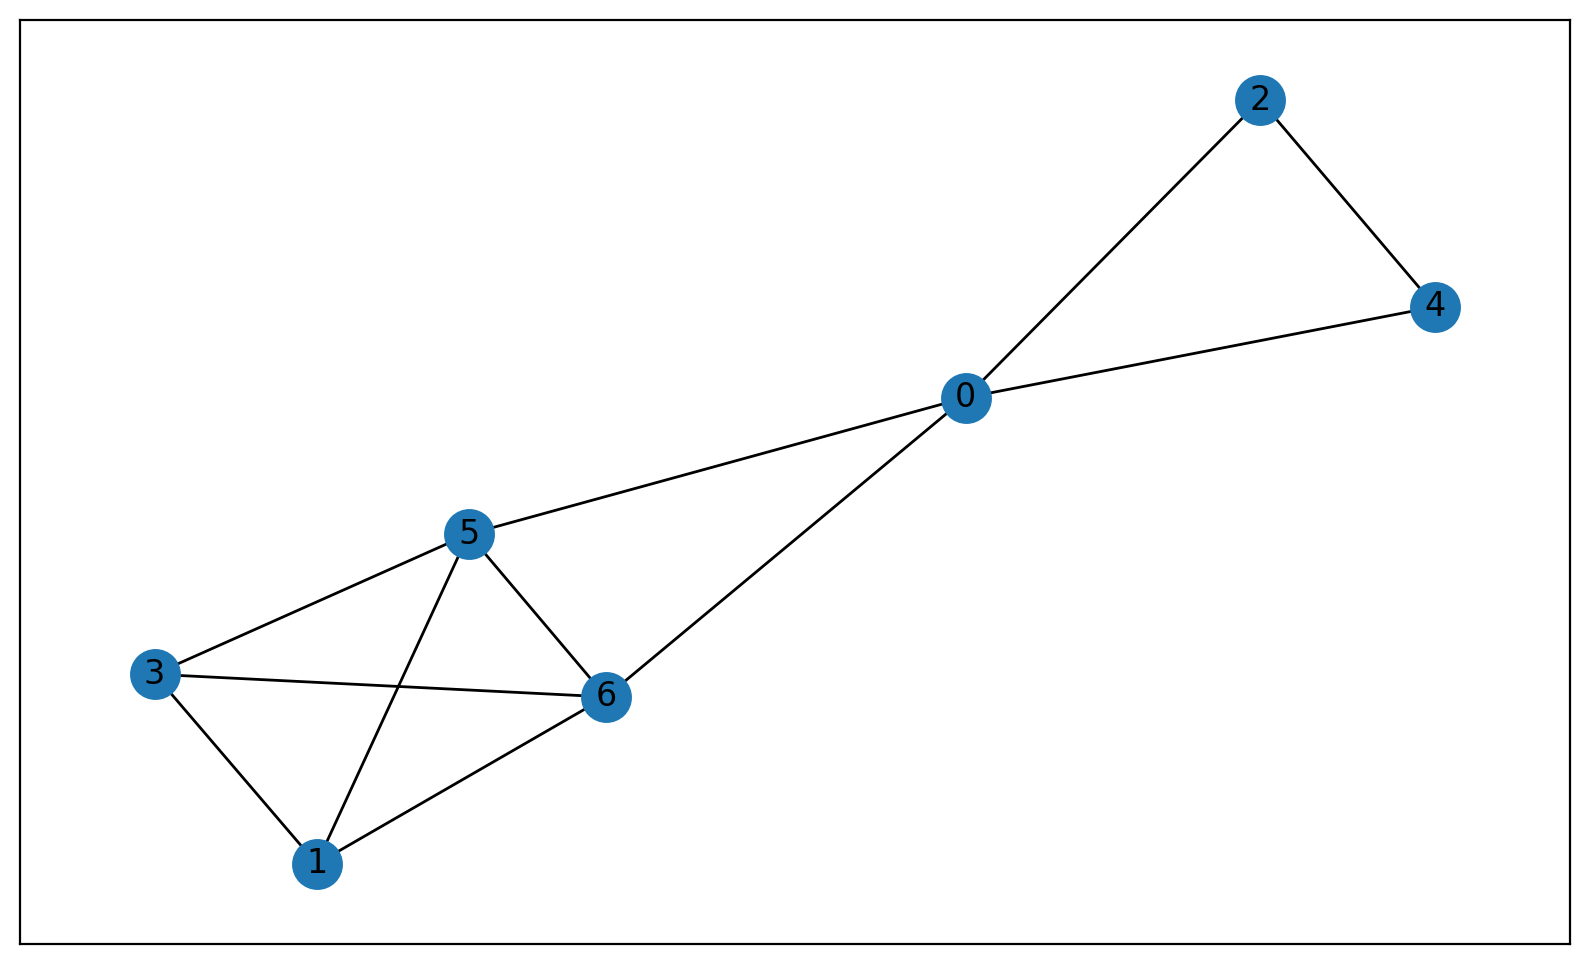

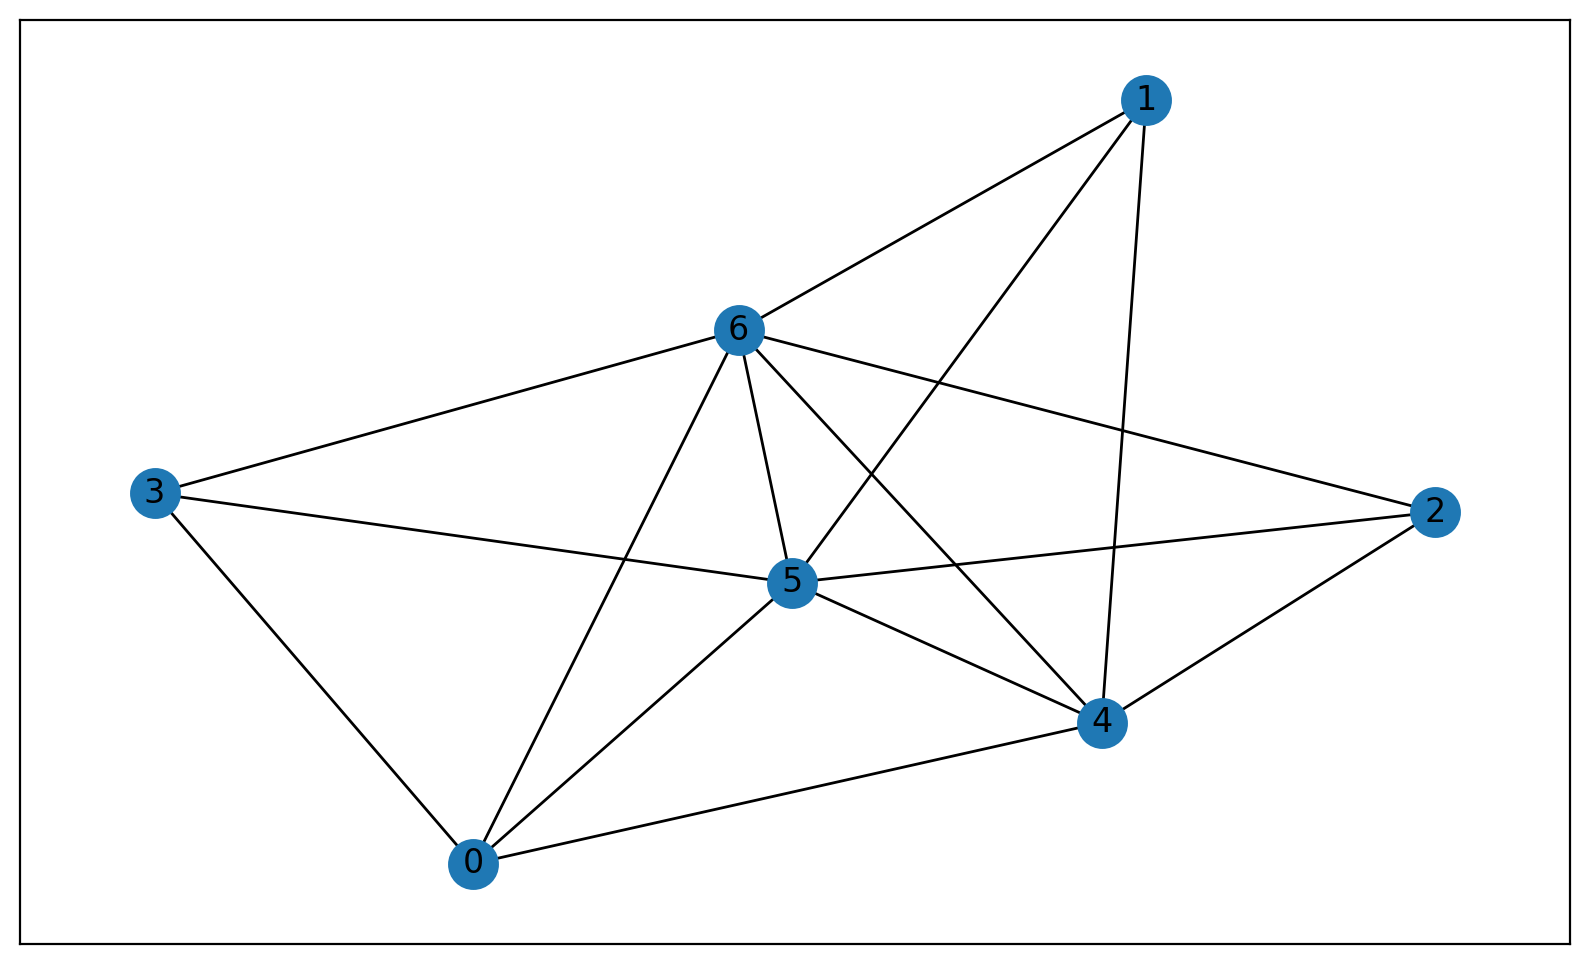

In [39]:
runthrough(63)
#check if it works